In [1]:
import pandas as pd
import numpy as np
# Loading the dataset
df = pd.read_csv('Life_Expectancy_Data.csv')

# Cleaning column names by stripping whitespace
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

print("Initial Data Overview")
print("\nFirst 5 rows of the dataset:")
print(df.head())



Initial Data Overview

First 5 rows of the dataset:
       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01               78.184215           67     2787  ...   
4             71     0.01                7.097109           68     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV/A

In [2]:
print("\nDescriptive Statistics for Numerical Columns (Before Cleaning):")
print(df.describe())


Descriptive Statistics for Numerical Columns (Before Cleaning):
              Year  Life_expectancy  Adult_Mortality  infant_deaths  \
count  1649.000000      1649.000000      1649.000000    1649.000000   
mean   2007.840509        69.302304       168.215282      32.553062   
std       4.087711         8.796834       125.310417     120.847190   
min    2000.000000        44.000000         1.000000       0.000000   
25%    2005.000000        64.400000        77.000000       1.000000   
50%    2008.000000        71.700000       148.000000       3.000000   
75%    2011.000000        75.000000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1600.000000   

           Alcohol  percentage_expenditure  Hepatitis_B        Measles  \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   

In [4]:
print("\nDataFrame Info:")
print(df.info())

# Identifing missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("\nMissing Values Count and Percentage for each feature:")
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))

# Storing initial descriptive statistics for comparison later
initial_describe = df.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_Mortality                  1649 non-null   int64  
 5   infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under_five_deaths                1649 non-null   int64  
 12  Pol

In [5]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1_19_years               0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [6]:
print(f"Duplicate Rows:\n{df.duplicated()}")

Duplicate Rows:
0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1649, dtype: bool


In [7]:
#Saving the cleaned data to a new csv file
df.to_csv("cleaned_life_expectancy_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_life_expectancy_data.csv'")


Cleaned data saved to 'cleaned_life_expectancy_data.csv'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset again to ensure a fresh start
new_data_set = pd.read_csv('cleaned_Life_Expectancy_data.csv')
print(new_data_set.head())



# Verifing cleaned column names
print("Cleaned Column Names after robust cleaning:")
print(new_data_set.columns.tolist())


       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01               78.184215           67     2787  ...   
4             71     0.01                7.097109           68     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0      6             

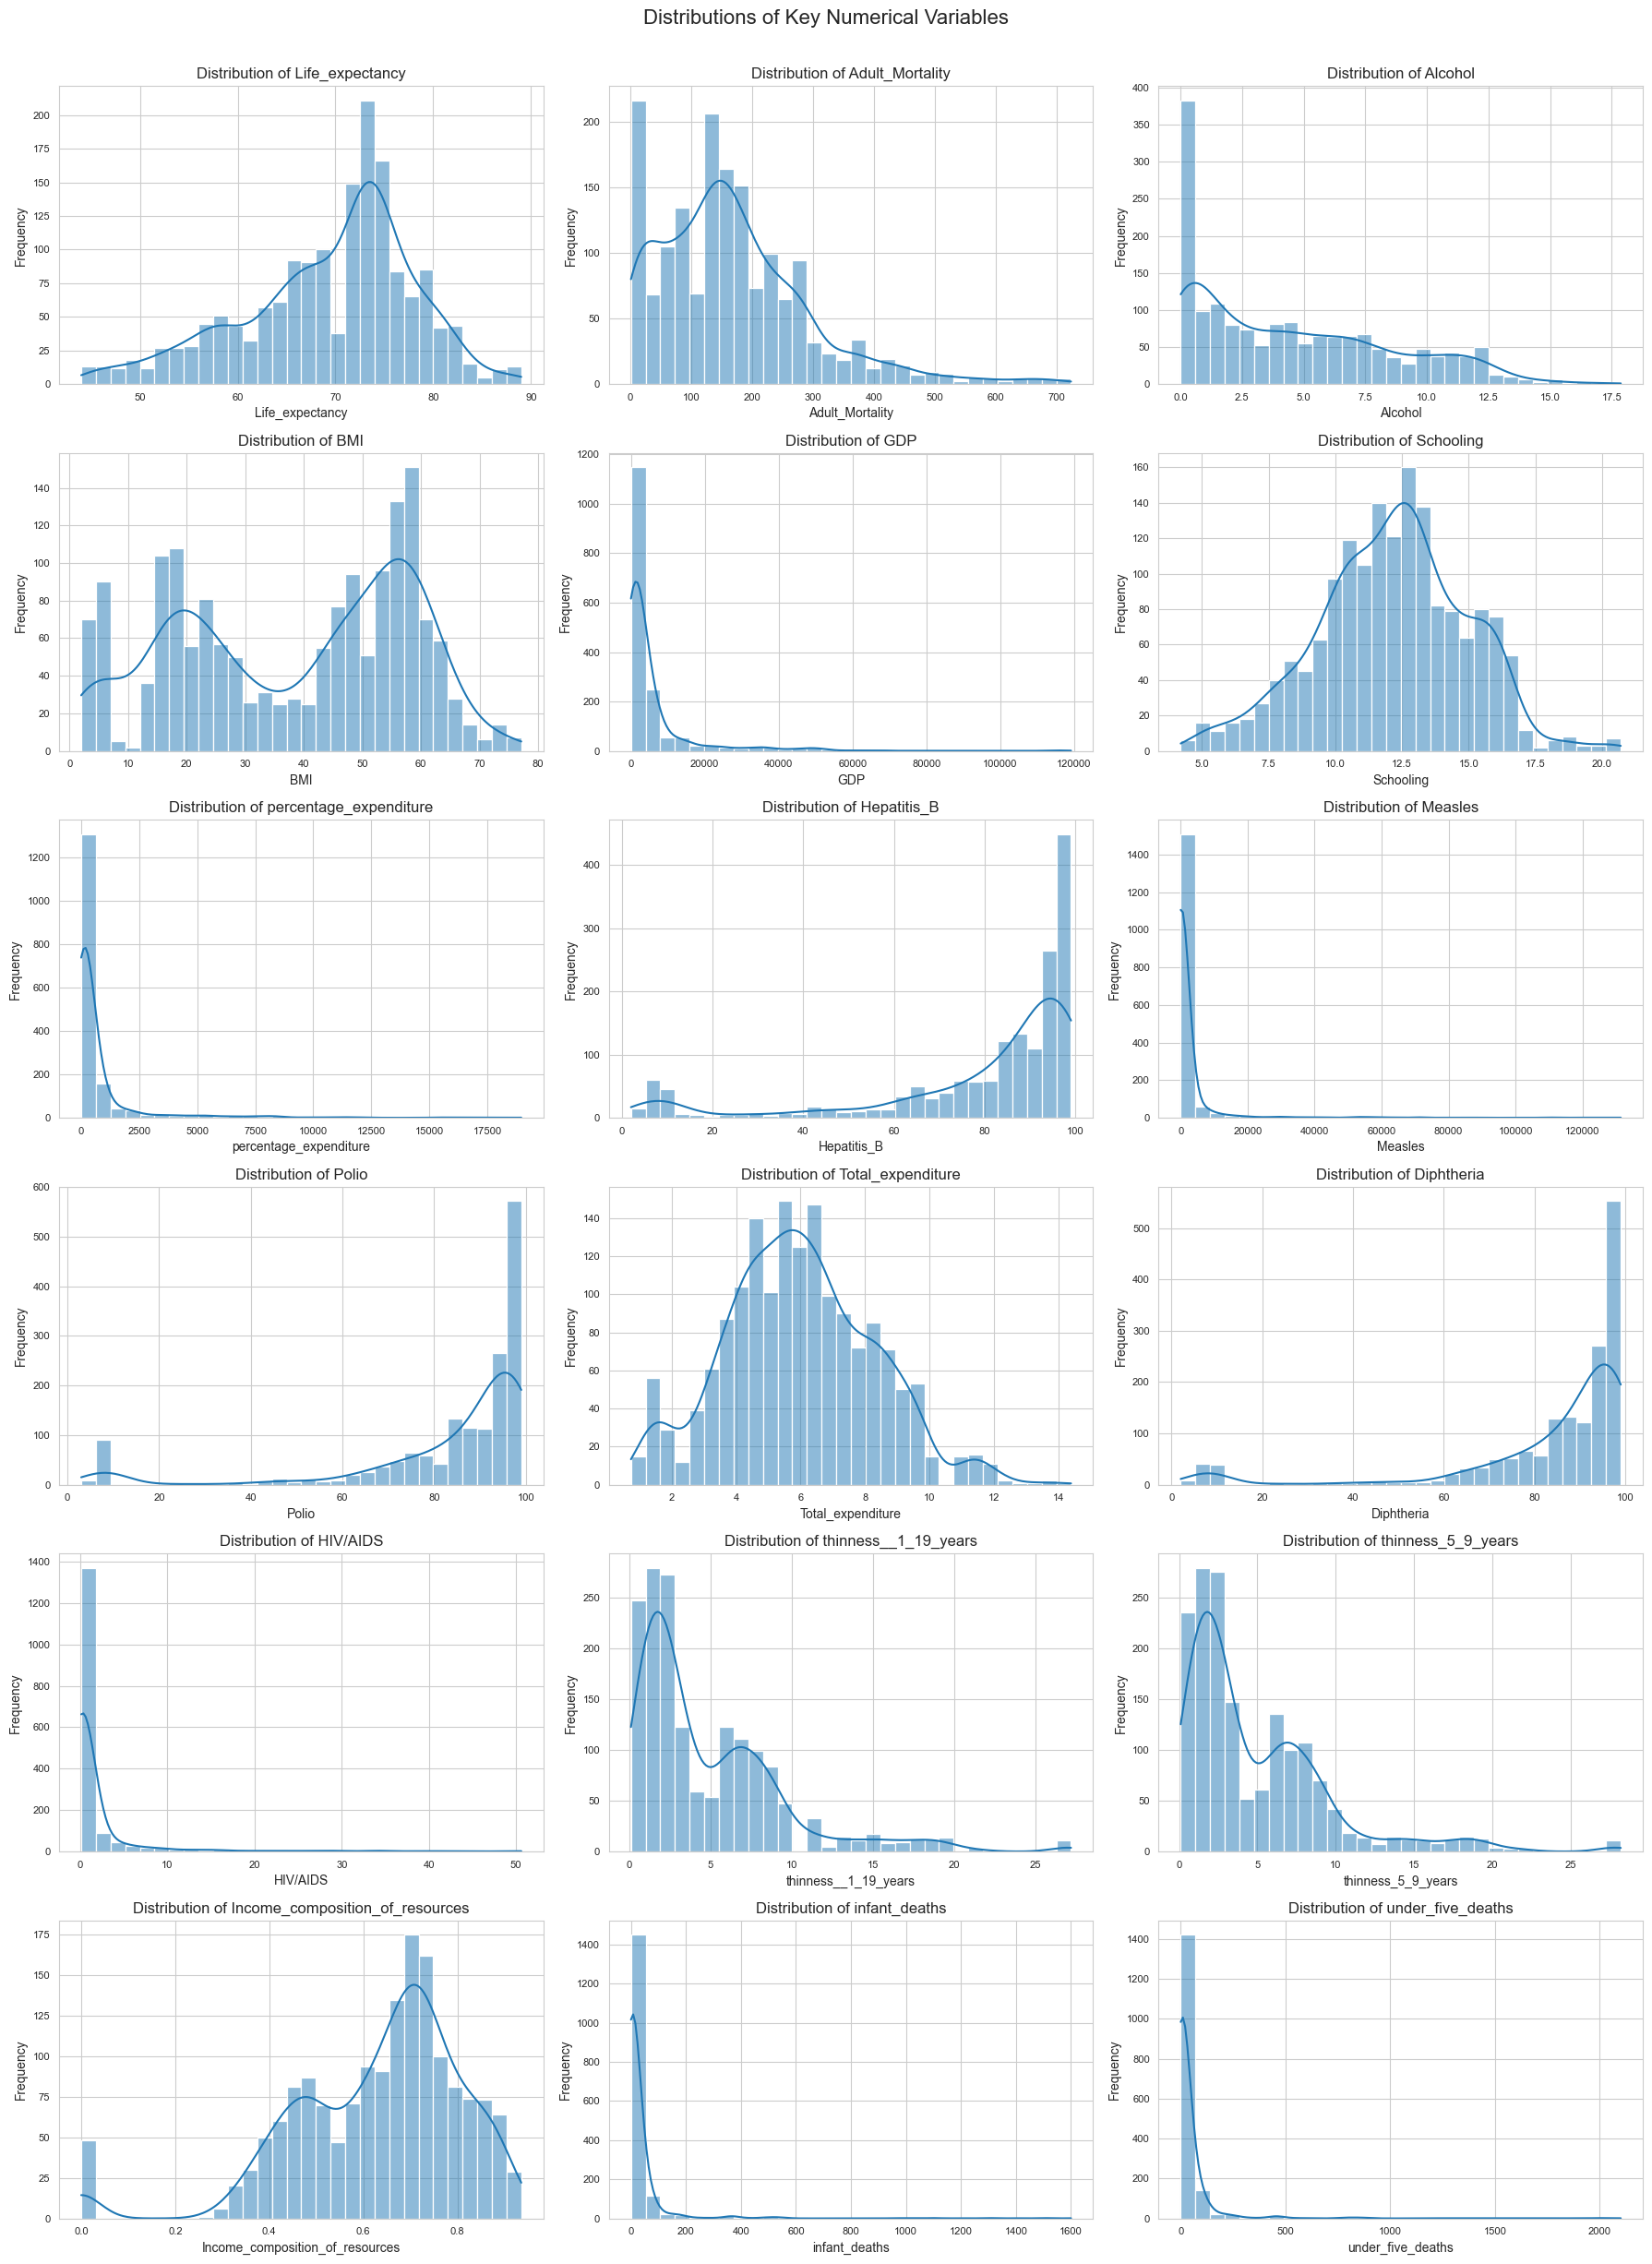

In [9]:
# NUMERICAL DATA VISUALIZATION
# Updating the numerical_cols list based on the new, clean column names
numerical_cols = [
    'Life_expectancy', 'Adult_Mortality', 'Alcohol', 'BMI', 'GDP', 'Schooling',
    'percentage_expenditure', 'Hepatitis_B', 'Measles', 'Polio', 'Total_expenditure',
    'Diphtheria', 'HIV/AIDS',
    'thinness__1_19_years', 'thinness_5_9_years',
    'Income_composition_of_resources', 'infant_deaths', 'under_five_deaths'
]

# Setting style for plots
sns.set_style("whitegrid")

# Creating histograms for key numerical variables
# Setting up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))
axes = axes.flatten() # Flattening the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(new_data_set[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Removing any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Key Numerical Variables', y=1.02, fontsize=16) # Adjusting y to prevent title overlap
plt.savefig('numerical_distributions_cleaned.png')
plt.show()

C:\Users\Maria\AppData\Local\Temp/ipykernel_2336/2658610643.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='viridis')


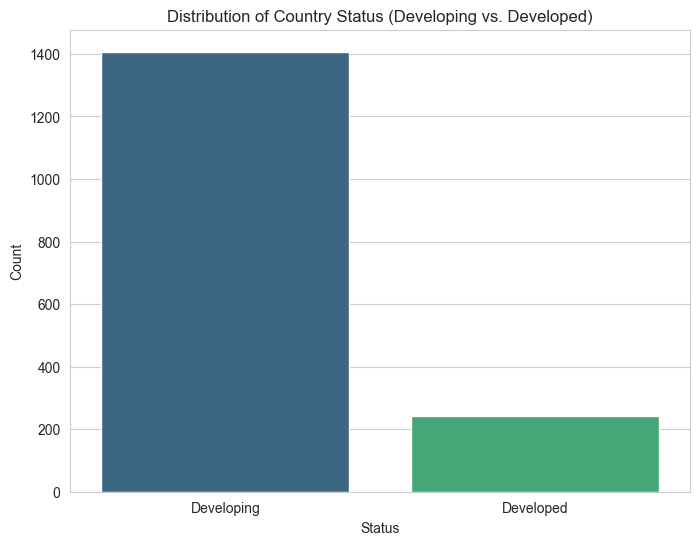

In [12]:
# CATEGORICAL DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column names are stripped
df.columns = df.columns.str.strip()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for the 'Status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Distribution of Country Status (Developing vs. Developed)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.savefig('status_distribution.png')
plt.show() 

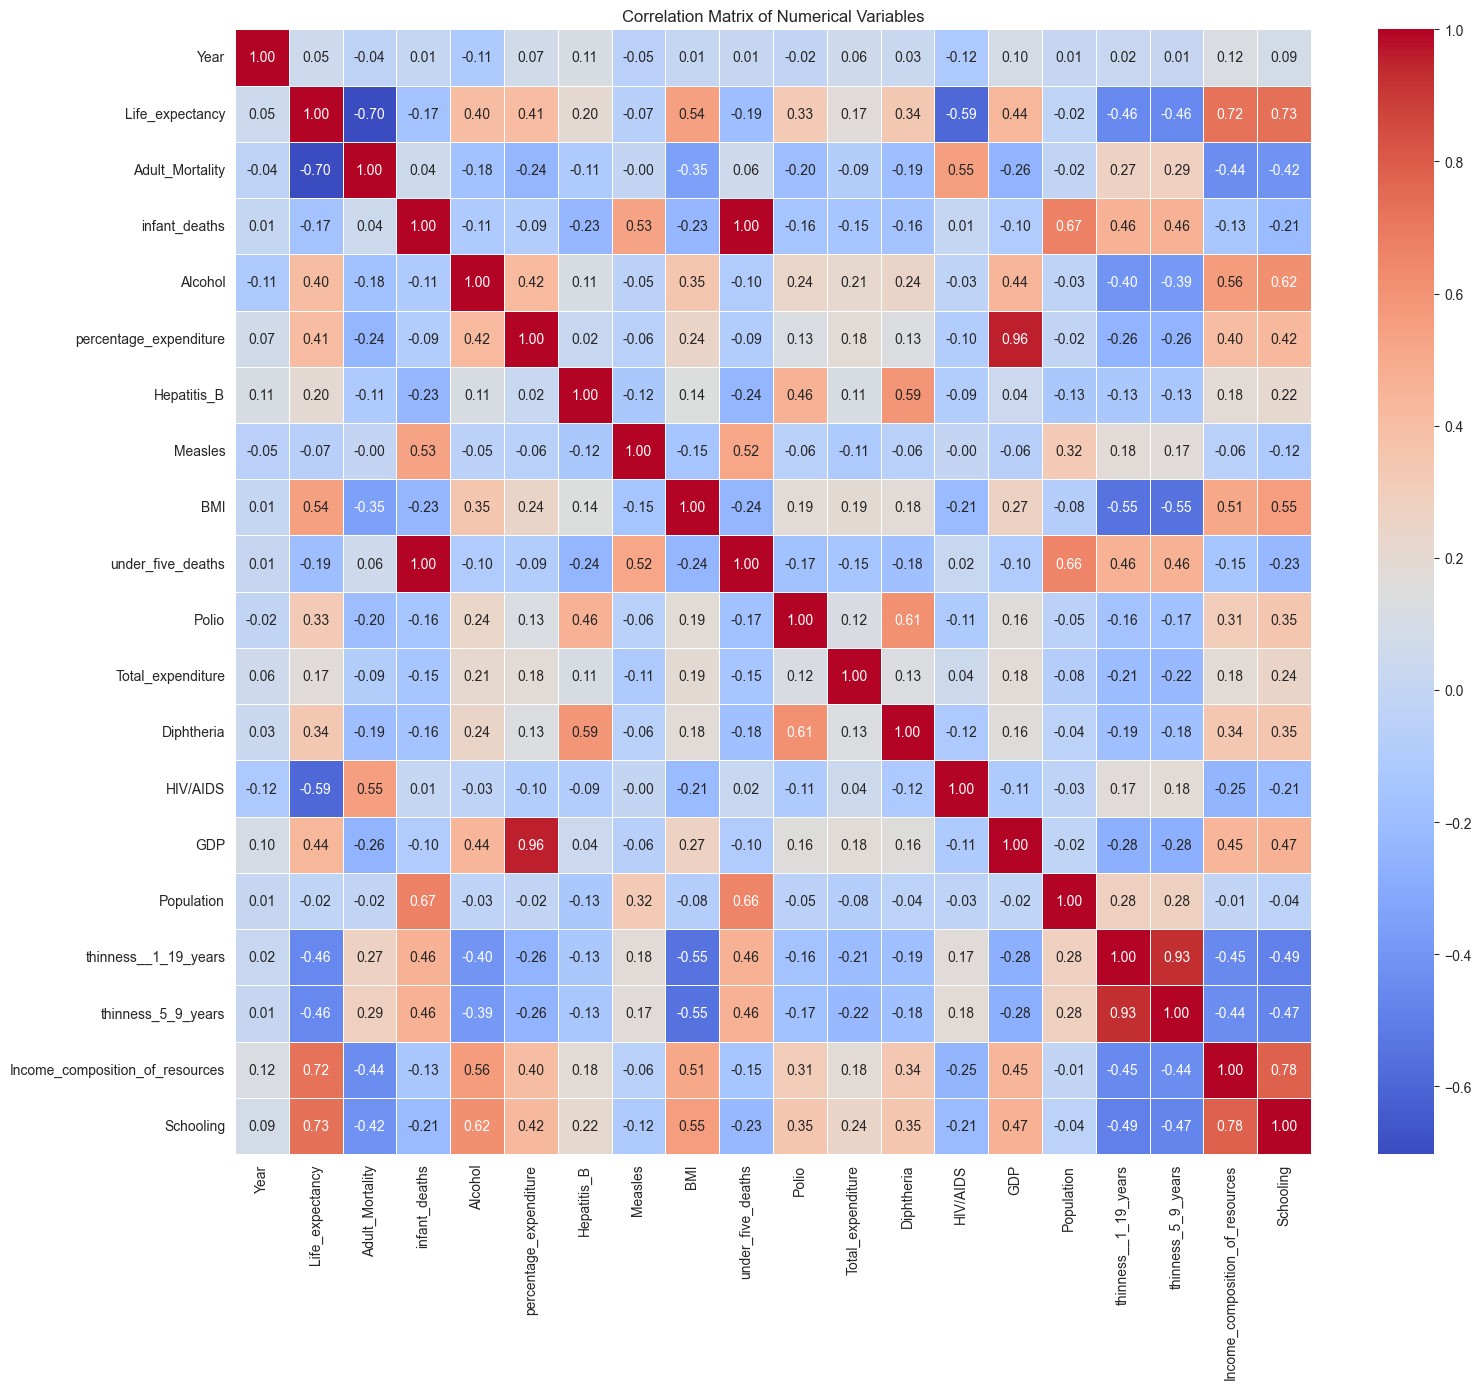

In [13]:
# CORRELATION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring column names are stripped
df.columns = df.columns.str.strip()

# Calculating the correlation matrix for numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

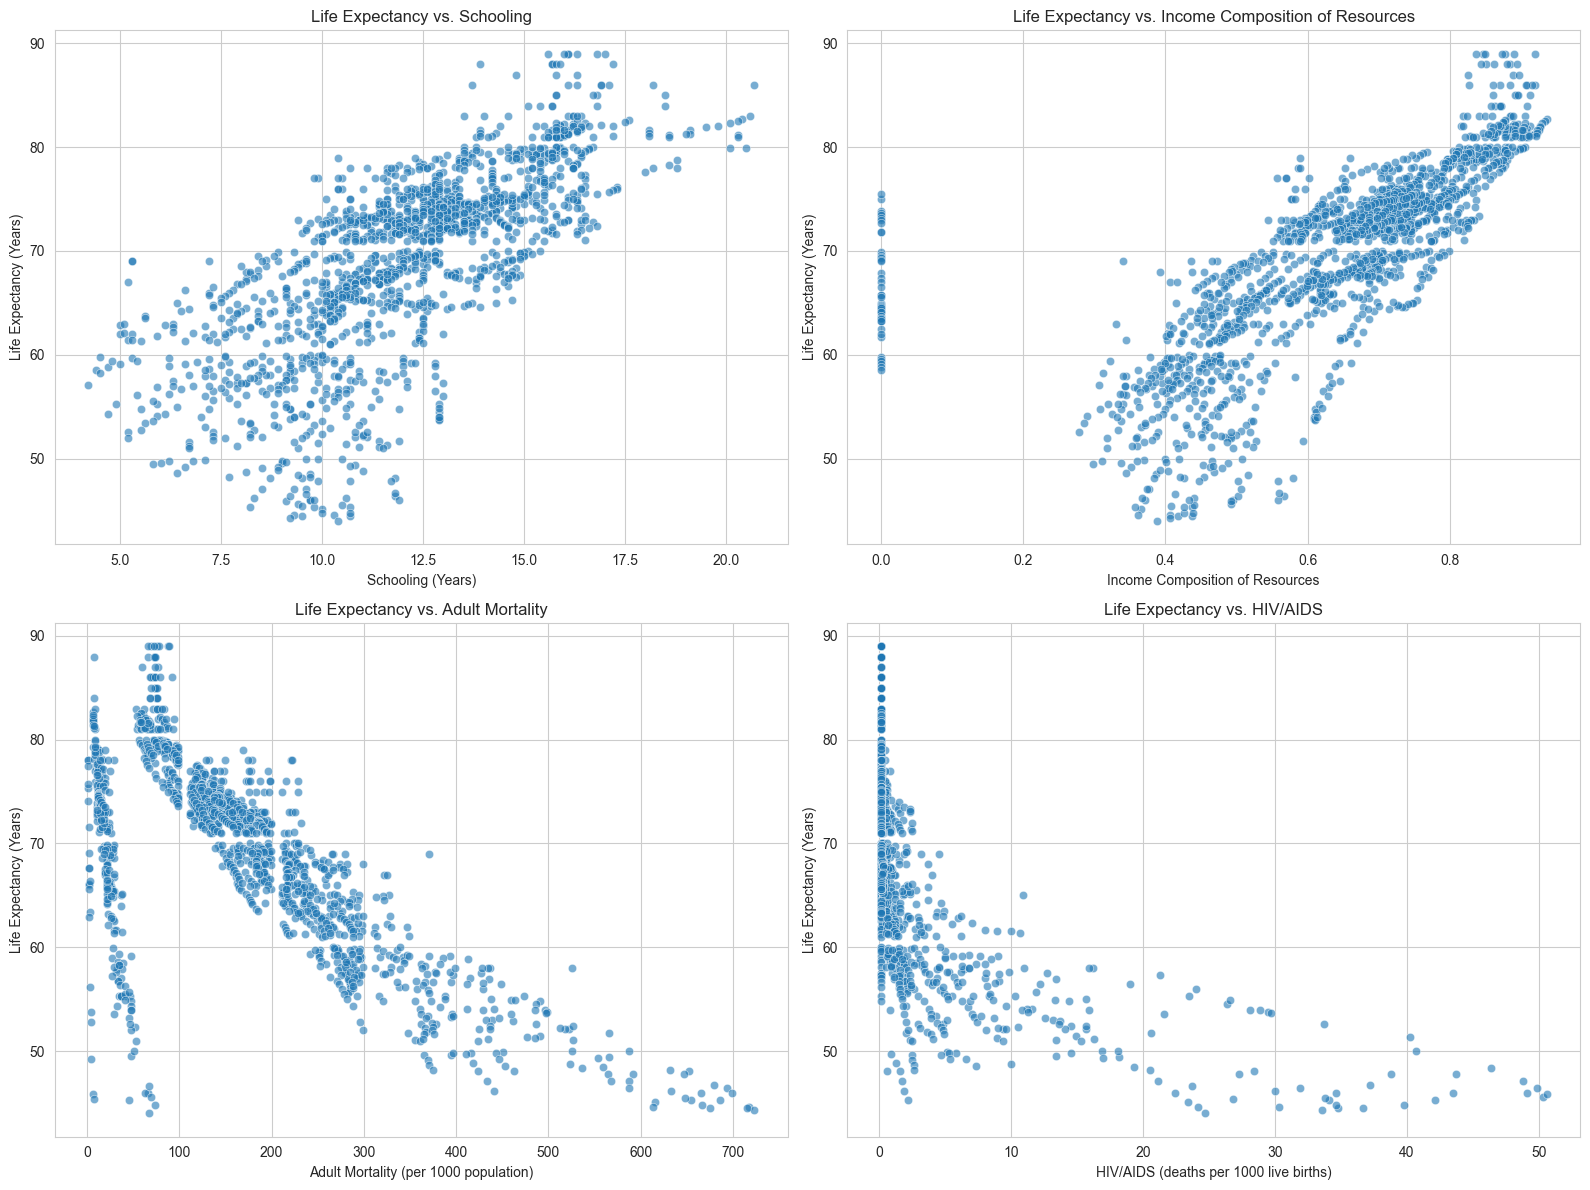

In [14]:
# VISUALIZING KEY RELATIONSHIPS
# scatter plots for key relationships with 'Life Expectancy'
import matplotlib.pyplot as plt
import seaborn as sns

# EnsurING column names are stripped
df.columns = df.columns.str.strip()

# Setting the whitegrid style of the plots
sns.set_style("whitegrid")

# Creating scatter plots for key relationships with 'Life expectancy'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Variables with strong positive correlation with Life Expectancy
sns.scatterplot(x='Schooling', y='Life_expectancy', data=df, ax=axes[0], alpha=0.6)
axes[0].set_title('Life Expectancy vs. Schooling')
axes[0].set_xlabel('Schooling (Years)')
axes[0].set_ylabel('Life Expectancy (Years)')

sns.scatterplot(x='Income_composition_of_resources', y='Life_expectancy', data=df, ax=axes[1], alpha=0.6)
axes[1].set_title('Life Expectancy vs. Income Composition of Resources')
axes[1].set_xlabel('Income Composition of Resources')
axes[1].set_ylabel('Life Expectancy (Years)')

# Variables with strong negative correlation with Life Expectancy
sns.scatterplot(x='Adult_Mortality', y='Life_expectancy', data=df, ax=axes[2], alpha=0.6)
axes[2].set_title('Life Expectancy vs. Adult Mortality')
axes[2].set_xlabel('Adult Mortality (per 1000 population)')
axes[2].set_ylabel('Life Expectancy (Years)')

sns.scatterplot(x='HIV/AIDS', y='Life_expectancy', data=df, ax=axes[3], alpha=0.6)
axes[3].set_title('Life Expectancy vs. HIV/AIDS')
axes[3].set_xlabel('HIV/AIDS (deaths per 1000 live births)')
axes[3].set_ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.savefig('key_relationships_scatterplots.png')
plt.show() 

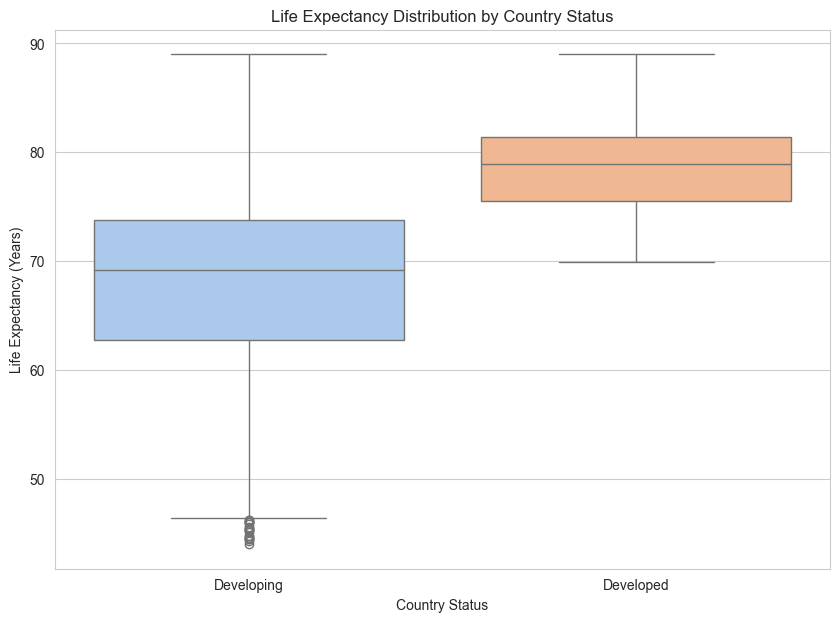

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# box plot comparing 'Life expectancy' between 'Developing' and 'Developed' countries

sns.set_style("whitegrid")

# Creating a box plot to compare Life expectancy by Status
plt.figure(figsize=(10, 7))
sns.boxplot(x='Status', y='Life_expectancy', data=df, hue='Status', palette='pastel', legend=False)
plt.title('Life Expectancy Distribution by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy (Years)')
plt.savefig('life_expectancy_by_status_boxplot.png')
plt.show() 

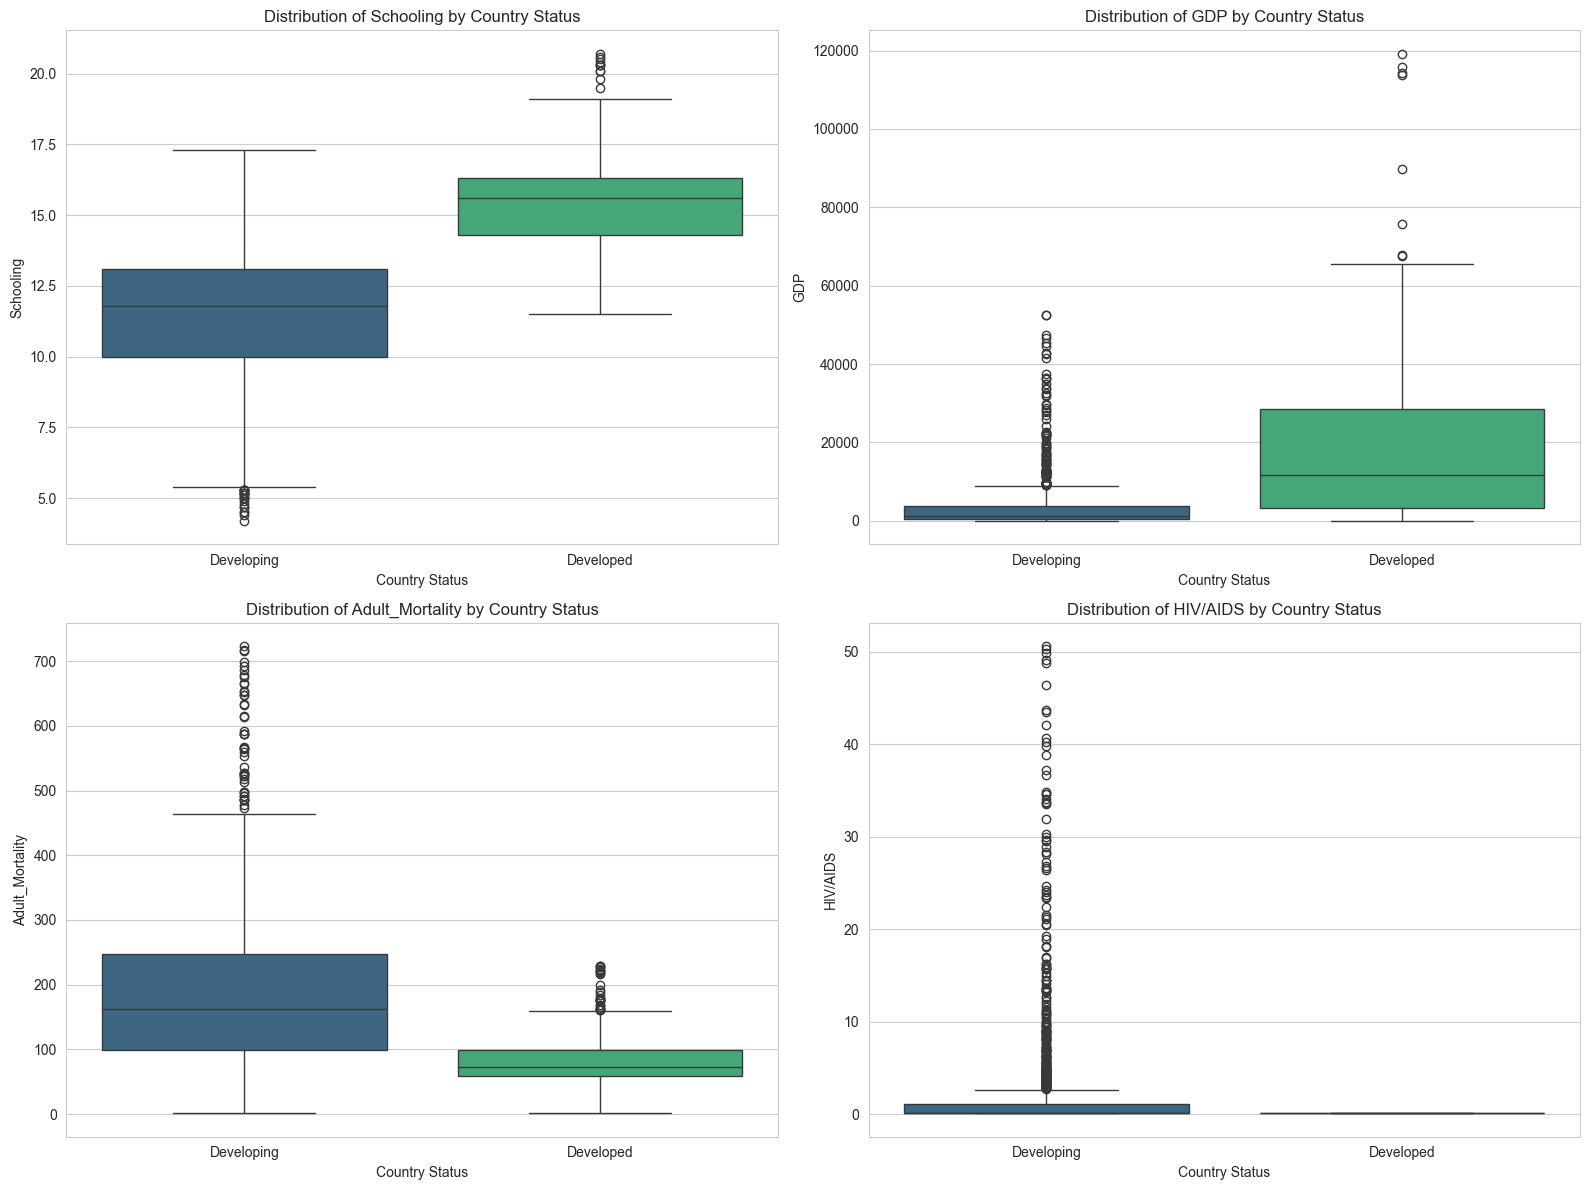

In [16]:
# Key Indicators Distribution by Country Status
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column names are stripped
df.columns = df.columns.str.strip()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with subplots for comparison of key indicators by Status
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# List of key indicators to compare by Status
key_indicators = ['Schooling', 'GDP', 'Adult_Mortality', 'HIV/AIDS']

# Plot box plots for each key indicator
for i, col in enumerate(key_indicators):
    # sns.boxplot(x='Status', y=col, data=df, ax=axes[i], palette='viridis')
    sns.boxplot(x='Status', y=col, data=df, ax=axes[i], hue='Status', palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {col} by Country Status')
    axes[i].set_xlabel('Country Status')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.savefig('key_indicators_by_status_boxplots.png')
plt.show() 

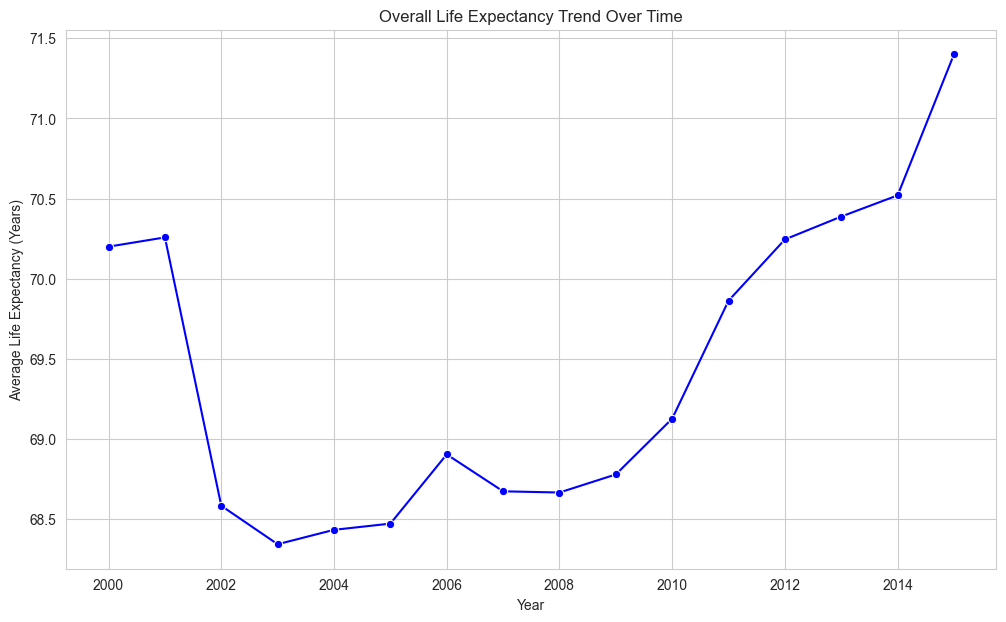

In [17]:
# Overall Life Expectancy Trend Over Time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure column names are stripped (important for correct column access)
df.columns = df.columns.str.strip()

# Calculate average Life expectancy per Year
life_expectancy_yearly = df.groupby('Year')['Life_expectancy'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot overall Life Expectancy trend over time
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Life_expectancy', data=life_expectancy_yearly, marker='o', color='blue')
plt.title('Overall Life Expectancy Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.savefig('overall_life_expectancy_trend.png')
plt.show()

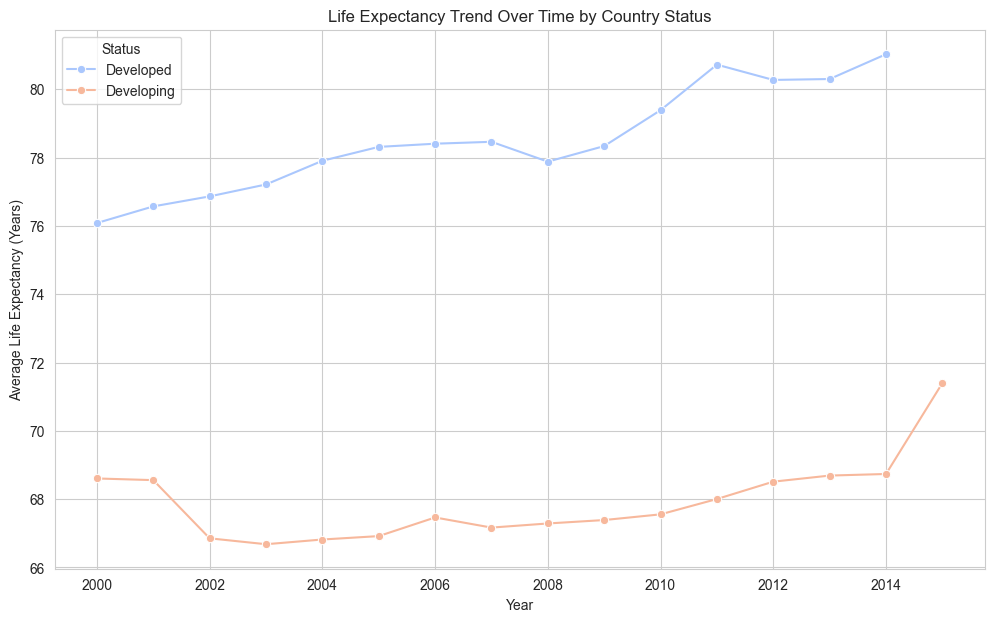

In [18]:
#  Life Expectancy Trend Over Time by Country Status
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure column names are stripped
df.columns = df.columns.str.strip()

# Calculate average Life expectancy per Year by Status
life_expectancy_yearly_status = df.groupby(['Year', 'Status'])['Life_expectancy'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot Life Expectancy trend over time by Status
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Life_expectancy', hue='Status', data=life_expectancy_yearly_status, marker='o', palette='coolwarm')
plt.title('Life Expectancy Trend Over Time by Country Status')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.savefig('life_expectancy_trend_by_status.png')
plt.show()

In [ ]:
import numpy as np
import re
import pandas as pd

# List of numerical columns to apply capping (outlier analysis)
cols_to_cap = [
    'Adult_Mortality', 'infant_deaths', 'Measles', 'HIV/AIDS', 'GDP', 'Population',
    'percentage_expenditure', 'Alcohol', 'thinness__1_19_years', 'thinness_5_9_years',
    'Total_expenditure', 'Diphtheria', 'Polio', 'Hepatitis_B'
]

# Function to apply IQR-based capping
def cap_outliers_iqr(df_in, column):
    # Create a copy to avoid SettingWithCopyWarning
    df_temp = df_in.copy()
    Q1 = df_temp[column].quantile(0.25)
    Q3 = df_temp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df_temp[column] = np.where(df_temp[column] < lower_bound, lower_bound, df_temp[column])
    df_temp[column] = np.where(df_temp[column] > upper_bound, upper_bound, df_temp[column])
    return df_temp

# Apply capping to selected columns
print("Applying IQR-based capping to columns")
for col in cols_to_cap:
    df = cap_outliers_iqr(df, col) 

print("\nDescriptive statistics of columns after re-applying capping (shows current state):")
print(df[cols_to_cap].describe().to_markdown(numalign="left", stralign="left"))

Applying IQR-based capping to columns

Descriptive statistics of columns after re-applying capping (shows current state):
|       | Adult_Mortality   | infant_deaths   | Measles   | HIV/AIDS   | GDP     | Population   | percentage_expenditure   | Alcohol   | thinness__1_19_years   | thinness_5_9_years   | Total_expenditure   | Diphtheria   | Polio   | Hepatitis_B   |
|:------|:------------------|:----------------|:----------|:-----------|:--------|:-------------|:-------------------------|:----------|:-----------------------|:---------------------|:--------------------|:-------------|:--------|:--------------|
| count | 1649              | 1649            | 1649      | 1649       | 1649    | 1649         | 1649                     | 1649      | 1649                   | 1649                 | 1649                | 1649         | 1649    | 1649          |
| mean  | 164.469           | 13.7668         | 240.046   | 0.483445   | 3301.76 | 5.12059e+06  | 338.703                  | 4.53264  

In [21]:
# Feature Engineering 

# 1. Creating 'Health_Expenditure_Per_Capita'
# Handling potential division by zero or very small population values
# If Population is 0, Health_Expenditure_Per_Capita will be 0, otherwise perform the division.
df['Health_Expenditure_Per_Capita'] = df.apply(
    lambda row: row['Total_expenditure'] / row['Population'] if row['Population'] != 0 else 0,
    axis=1
)

# 2. Creating 'Schooling_Income_Interaction'
df['Schooling_Income_Interaction'] = df['Schooling'] * df['Income_composition_of_resources']

# Displaying the first few rows with the new features
print("\nDataFrame with new engineered features (first 5 rows):")
print(df[['Country', 'Year', 'Total_expenditure', 'Population', 'Health_Expenditure_Per_Capita',
          'Schooling', 'Income_composition_of_resources', 'Schooling_Income_Interaction']].head().to_markdown(index=False, numalign="left", stralign="left"))

# Checking for any new missing values introduced
print("\nMissing values after feature engineering:")
print(df[['Health_Expenditure_Per_Capita', 'Schooling_Income_Interaction']].isnull().sum().to_markdown(numalign="left", stralign="left"))


DataFrame with new engineered features (first 5 rows):
| Country     | Year   | Total_expenditure   | Population   | Health_Expenditure_Per_Capita   | Schooling   | Income_composition_of_resources   | Schooling_Income_Interaction   |
|:------------|:-------|:--------------------|:-------------|:--------------------------------|:------------|:----------------------------------|:-------------------------------|
| Afghanistan | 2015   | 8.16                | 1.88596e+07  | 4.32671e-07                     | 10.1        | 0.479                             | 4.8379                         |
| Afghanistan | 2014   | 8.18                | 327582       | 2.49708e-05                     | 10          | 0.476                             | 4.76                           |
| Afghanistan | 2013   | 8.13                | 1.88596e+07  | 4.31081e-07                     | 9.9         | 0.47                              | 4.653                          |
| Afghanistan | 2012   | 8.52                | 3.

Plots for new engineered features


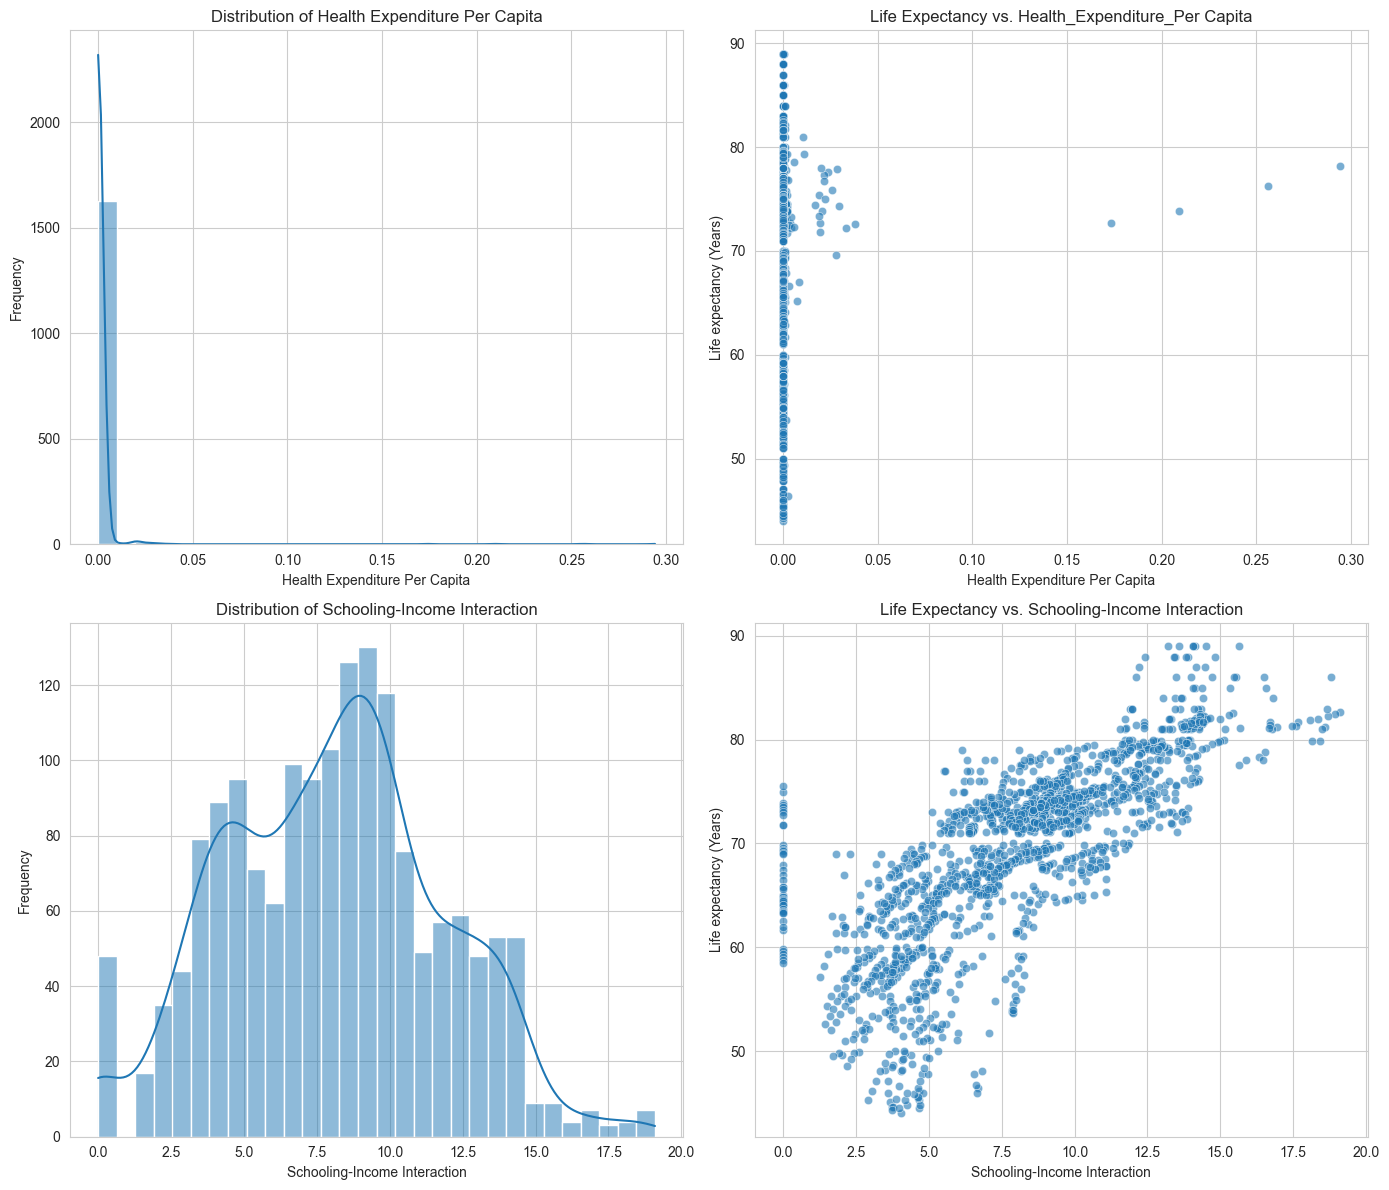

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import numpy as np


#  Plotting the new features 
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Histogram for Health_Expenditure_Per_Capita
sns.histplot(df['Health_Expenditure_Per_Capita'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of Health Expenditure Per Capita')
axes[0].set_xlabel('Health Expenditure Per Capita')
axes[0].set_ylabel('Frequency')

# Scatter plot for Health_Expenditure_Per_Capita vs. Life expectancy
sns.scatterplot(x='Health_Expenditure_Per_Capita', y='Life_expectancy', data=df, ax=axes[1], alpha=0.6)
axes[1].set_title('Life Expectancy vs. Health_Expenditure_Per Capita')
axes[1].set_xlabel('Health Expenditure Per Capita')
axes[1].set_ylabel('Life expectancy (Years)')

# Histogram for Schooling_Income_Interaction
sns.histplot(df['Schooling_Income_Interaction'], kde=True, ax=axes[2], bins=30)
axes[2].set_title('Distribution of Schooling-Income Interaction')
axes[2].set_xlabel('Schooling-Income Interaction')
axes[2].set_ylabel('Frequency')

# Scatter plot for Schooling_Income_Interaction vs. Life expectancy
sns.scatterplot(x='Schooling_Income_Interaction', y='Life_expectancy', data=df, ax=axes[3], alpha=0.6)
axes[3].set_title('Life Expectancy vs. Schooling-Income Interaction')
axes[3].set_xlabel('Schooling-Income Interaction')
axes[3].set_ylabel('Life expectancy (Years)')

plt.tight_layout()
plt.savefig('new_features_plots.png')

print("Plots for new engineered features")

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import re

# Robustly clean column names: replace multiple spaces with single space and strip
df.columns = [re.sub(r'\s+', ' ', col).strip() for col in df.columns]

# Define features (X) and target (y)
y = df['Life_expectancy']
# Drop 'Life expectancy' (target) and 'Country' (high cardinality, will be ignored for now)
X = df.drop(['Life_expectancy', 'Country'], axis=1)

# Handle 'Status' categorical variable using One-Hot Encoding
# Ensure 'Status' is treated as a category before one-hot encoding for robustness
X['Status'] = X['Status'].astype('category')
X = pd.get_dummies(X, columns=['Status'], drop_first=True, dtype=int) # drop_first to avoid multicollinearity

# Identify numerical columns for scaling
# Exclude 'Status_Developing' which is now numerical but a result of one-hot encoding
numerical_cols_to_scale = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Status_Developing' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('Status_Developing')

# Apply StandardScaler to the identified numerical columns
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# Split the data into training and testing sets
# Using a common split of 80% training, 20% testing
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data splitting.
X_train shape: (1319, 22)
X_test shape: (330, 22)
y_train shape: (1319,)
y_test shape: (330,)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure column names are robustly cleaned
df.columns = [re.sub(r'\s+', ' ', col).strip() for col in df.columns]

# Define features (X) and target (y)
y = df['Life_expectancy']
X = df.drop(['Life_expectancy', 'Country'], axis=1)

# Handle 'Status' categorical variable using One-Hot Encoding
X['Status'] = X['Status'].astype('category')
X = pd.get_dummies(X, columns=['Status'], drop_first=True, dtype=int)

# Identify numerical columns for scaling (excluding 'Status_Developing' from scaling)
numerical_cols_to_scale = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Status_Developing' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('Status_Developing')

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model Training
print("Training Random Forest Regressor model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training Random Forest Regressor model...
Model training complete.


In [25]:
# Model Evaluation
print("\nEvaluating model performance...")
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Evaluating model performance...
Mean Absolute Error (MAE): 1.18
Mean Squared Error (MSE): 3.96
Root Mean Squared Error (RMSE): 1.99
R-squared (R2): 0.94
